In [5]:
import sys
sys.path.insert(0,'../PLASIM/')
import Learn2_new as ln
ut = ln.ut # utilities
ef = ln.ef # ERA_Fields_New

# log to stdout
import logging
import os
logging.getLogger().level = logging.INFO
logging.getLogger().handlers = [logging.StreamHandler(sys.stdout)]

# set spacing of the indentation
ut.indentation_sep = '  '

In [110]:
import itertools as its

Months1 = [0, 0, 0, 0, 0, 0, 31, 30, 31, 31, 30, 0, 0, 0] # Because of 3 day running mean we lose 2 days
Tot_Mon1 = list(its.accumulate(Months1))
X, Y, yp, lat, lon = ln.prepare_data(**ut.set_values_recursive(ln.get_default_params(ln.prepare_data, recursive=True),
                                            {'fields': ['t2m','zg500','mrso'], 'year_list' : 'range(1950,1960)', 'mylocal' : '/net/nfs/ssd2/gmiloshe/Climate-Learning/ERA/', 
                                            'time_start' : Tot_Mon1[6], 'time_end' : Tot_Mon1[9], 'fillna' : 0, # Take into account number of days per month in CESM
                                            'lon_start' : - 480//2, 'lon_end' : 480//2,
                                            #'lon_start' : -12, 'lon_end' : 36, 'nfolds' : 2, 'u' : 1,
                                            'lat_end' : 241*60//180, 'lat_start' : 0, # latitudes start from 90 degrees North Pole
                                            'Model' : 'ERA5', 'datafolder' : 'Data_ERA5', 'dataset_years' : 1000, 'preprefix' : 'ERA5_', 
                                            'lsmsource' : 'Data_ERA5/Land-sea_mask.nc', 'areasource' : 'Data_ERA5/ERA5_area.nc'}))
LON, LAT = ln.np.meshgrid(lon, lat)

prepare_data:
  load_data:
    Opening field t2m
    The provided path strings are self.mylocal = '/net/nfs/ssd2/gmiloshe/Climate-Learning/ERA/', self.filename = 'Data_ERA5/ERA5_t2m.nc'
    First valid path found in /net/nfs/ssd2/gmiloshe/Climate-Learning/ERA/Data_ERA5/ERA5_t2m.nc
    monotonize_years:
    monotonize_years: completed in 0.0 s
    The loaded field has 70 years, not 1000 as provided. Setting self.years = 70
    First valid path found in /net/nfs/ssd2/gmiloshe/Climate-Learning/ERA/Data_ERA5/Land-sea_mask.nc
    First valid path found in /net/nfs/ssd2/gmiloshe/Climate-Learning/ERA/Data_ERA5/ERA5_area.nc
    select_years:
    select_years: completed in 0.0 s
    sort_lat:
    sort_lat: completed in 0.0 s
    select_lonlat:
      Filling missing values with 0
    select_lonlat: completed in 0.7 s
    First valid path found in /net/nfs/ssd2/gmiloshe/Climate-Learning/ERA/Data_ERA5/Land-sea_mask.nc
    Opening field z
    The provided path strings are self.mylocal = '/net/nfs/s

There is a problem with `X.shape`

In [111]:
import itertools as its

Months1 = [0, 0, 0, 0, 0, 0, 31, 30, 31, 31, 30, 0, 0, 0] # Because of 3 day running mean we lose 2 days
Tot_Mon1 = list(its.accumulate(Months1))
fields = ln.load_data(**ut.set_values_recursive(ln.get_default_params(ln.load_data, recursive=True),
                                            {'fields': ['t2m','zg500','mrso'], 'year_list' : 'range(1950,1960)', 'mylocal' : '/net/nfs/ssd2/gmiloshe/Climate-Learning/ERA/', 
                                            'time_start' : Tot_Mon1[6], 'time_end' : Tot_Mon1[9], 'fillna' : 0, # Take into account number of days per month in CESM
                                            'lon_start' : - 480//2, 'lon_end' : 480//2,
                                            #'lon_start' : -12, 'lon_end' : 36, 'nfolds' : 2, 'u' : 1,
                                            'lat_end' : 241*60//180, 'lat_start' : 0, # latitudes start from 90 degrees North Pole
                                            #'lon_start' : -12, 'lon_end' : 36, 'nfolds' : 2, 'u' : 1,
                                            #'lat_end' : 192-40, 'lat_start' : 192-192*60//180, # latitudes start from 90 degrees North Pole
                                            'Model' : 'ERA5', 'datafolder' : 'Data_ERA5', 'dataset_years' : 1000, 'preprefix' : 'ERA5_', 
                                            'lsmsource' : 'Data_ERA5/Land-sea_mask.nc', 'areasource' : 'Data_ERA5/ERA5_area.nc'}))


load_data:
  Opening field t2m
  The provided path strings are self.mylocal = '/net/nfs/ssd2/gmiloshe/Climate-Learning/ERA/', self.filename = 'Data_ERA5/ERA5_t2m.nc'
  First valid path found in /net/nfs/ssd2/gmiloshe/Climate-Learning/ERA/Data_ERA5/ERA5_t2m.nc
  monotonize_years:
  monotonize_years: completed in 0.0 s
  The loaded field has 70 years, not 1000 as provided. Setting self.years = 70
  First valid path found in /net/nfs/ssd2/gmiloshe/Climate-Learning/ERA/Data_ERA5/Land-sea_mask.nc
  First valid path found in /net/nfs/ssd2/gmiloshe/Climate-Learning/ERA/Data_ERA5/ERA5_area.nc
  select_years:
  select_years: completed in 0.0 s
  sort_lat:
  sort_lat: completed in 0.0 s
  select_lonlat:
    Filling missing values with 0
  select_lonlat: completed in 0.7 s
  First valid path found in /net/nfs/ssd2/gmiloshe/Climate-Learning/ERA/Data_ERA5/Land-sea_mask.nc
  Opening field z
  The provided path strings are self.mylocal = '/net/nfs/ssd2/gmiloshe/Climate-Learning/ERA/', self.filename =

In [112]:
fields['t2m'].var.shape

(10, 153, 80, 480)

norm = <matplotlib.colors.TwoSlopeNorm object at 0x7fabb35156a0>


<GeoAxesSubplot:>

<Figure size 900x600 with 0 Axes>

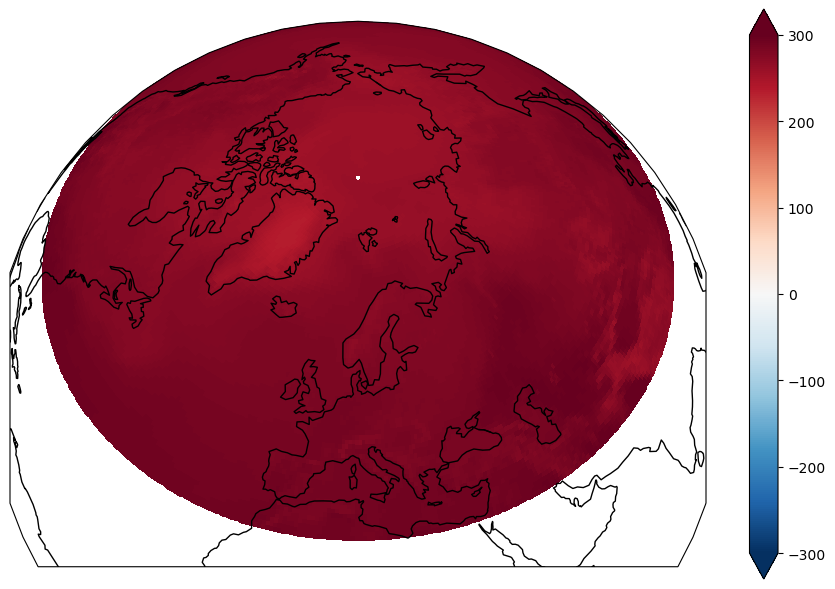

In [114]:

import cartopy.crs as ccrs
import general_purpose.cartopy_plots as cplt
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(9,6))
cplt.multiple_field_plot2(LON, LAT, fields['t2m'].var[0,0,:,:,np.newaxis],projections=[ccrs.Orthographic(10, 55)],
                        fig_num=8, put_colorbar=True, use_norm=True, levs=np.linspace(-300,300,32),
                        extents=[None, None, (-5, 10, 39, 60)],
                        mode='pcolormesh',draw_labels=False,draw_gridlines=False,
                        )

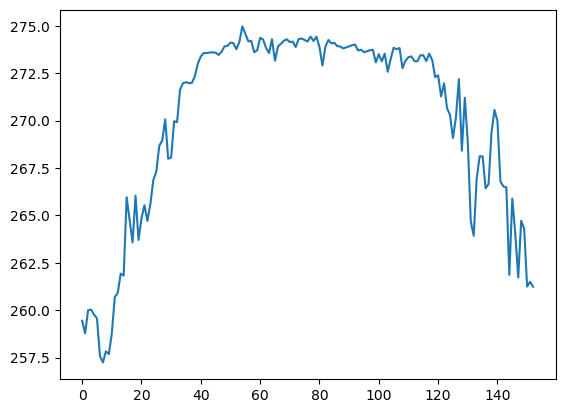

In [17]:
import matplotlib.pyplot as plt
plt.plot(fields['t2m'].var[0,:,0,0])

In [20]:
lon.shape


(128,)

This seems to work. So the problem with `X` comes from elsewhere

In [7]:
import xarray as xr

# Open the NetCDF file
test =  xr.open_dataset('/net/nfs/ssd2/gmiloshe/Climate-Learning/ERA/Data_ERA5/ERA5_t2m.nc')

# Access the variables in the dataset
test

<xarray.Dataset>
Dimensions:    (time: 10710, bnds: 2, longitude: 480, latitude: 241)
Coordinates:
  * time       (time) datetime64[ns] 1950-05-01T10:30:00 ... 2019-09-30T10:30:00
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 ... 357.0 357.8 358.5 359.2
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Fri Oct 13 13:42:58 2023: cdo -selmon,5,6,7,8,9 Data_ERA5/E...
    frequency:    day
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [12]:
import xarray as xr

# Open the NetCDF file
test =  xr.open_dataset('/net/nfs/ssd2/gmiloshe/Climate-Learning/ERA/ERA5/linear/ANO_t2m.nc')

# Access the variables in the dataset
test

<xarray.Dataset>
Dimensions:    (time: 10710, bnds: 2, longitude: 480, latitude: 241)
Coordinates:
  * time       (time) datetime64[ns] 1950-05-01T10:30:00 ... 2019-09-30T10:30:00
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 ... 357.0 357.8 358.5 359.2
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Fri Oct 13 13:46:12 2023: cdo ydaysub ERA5/linear/t2m.nc -y...
    frequency:    day
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [130]:
import itertools as its

Months1 = [0, 0, 0, 0, 0, 0, 31, 30, 31, 31, 30, 0, 0, 0] # Because of 3 day running mean we lose 2 days
Tot_Mon1 = list(its.accumulate(Months1))
X, Y, yp, lat, lon  = ln.prepare_data(**ut.set_values_recursive(ln.get_default_params(ln.prepare_data, recursive=True),
                                            {'fields': ['t2m_filtered','zg500','mrso_filtered'], 'year_list' : 'range(1950,2020)', 'mylocal' : '/net/nfs/ssd2/gmiloshe/Climate-Learning/ERA/', 
                                            'time_start' : Tot_Mon1[6], 'time_end' : Tot_Mon1[9], 'fillna' : 0, # Take into account number of days per month in CESM
                                            #'lon_start' : - 288//2, 'lon_end' : 288//2,
                                            #'lon_start' : -12, 'lon_end' : 36, 'nfolds' : 2, 'u' : 1,
                                            #'lat_end' : 192-40, 'lat_start' : 192-192*60//180, # latitudes start from 90 degrees North Pole
                                            'Model' : 'ERA5', 'datafolder' : 'Data_ERA5_regridded', 'dataset_years' : 1000, 'preprefix' : 'ANO_', 
                                            'lsmsource' : 'Data_ERA5_regridded/CONTROL_lsmask.nc', 'areasource' : 'Data_ERA5_regridded/CONTROL_gparea.nc'}))
LON, LAT = ln.np.meshgrid(lon, lat)

prepare_data:
  load_data:
    Opening field t2m
    The provided path strings are self.mylocal = '/net/nfs/ssd2/gmiloshe/Climate-Learning/ERA/', self.filename = 'Data_ERA5_regridded/ANO_t2m.nc'
    First valid path found in /net/nfs/ssd2/gmiloshe/Climate-Learning/ERA/Data_ERA5_regridded/ANO_t2m.nc
    monotonize_years:
    monotonize_years: completed in 0.0 s
    The loaded field has 70 years, not 1000 as provided. Setting self.years = 70
    First valid path found in /net/nfs/ssd2/gmiloshe/Climate-Learning/ERA/Data_ERA5_regridded/CONTROL_lsmask.nc
    First valid path found in /net/nfs/ssd2/gmiloshe/Climate-Learning/ERA/Data_ERA5_regridded/CONTROL_gparea.nc
    select_years:
    select_years: completed in 0.0 s
    sort_lat:
    sort_lat: completed in 0.0 s
    select_lonlat:
      Filling missing values with 0
    select_lonlat: completed in 0.3 s
    Filtering field t2m over France
    First valid path found in /net/nfs/ssd2/gmiloshe/Climate-Learning/ERA/Data_ERA5_regridded/CONTROL

In [131]:
fields['t2m'].var.shape

(70, 153, 22, 128)

In [132]:
import itertools as its

Months1 = [0, 0, 0, 0, 0, 0, 31, 30, 31, 31, 30, 0, 0, 0] # Because of 3 day running mean we lose 2 days
Tot_Mon1 = list(its.accumulate(Months1))
fields  = ln.load_data(**ut.set_values_recursive(ln.get_default_params(ln.load_data, recursive=True),
                                            {'fields': ['t2m_filtered','zg500','mrso'], 'year_list' : 'range(1950,2020)', 'mylocal' : '/net/nfs/ssd2/gmiloshe/Climate-Learning/ERA/', 
                                            'time_start' : Tot_Mon1[6], 'time_end' : Tot_Mon1[9], 'fillna' : 0, # Take into account number of days per month in CESM
                                            #'lon_start' : - 288//2, 'lon_end' : 288//2,
                                            #'lon_start' : -12, 'lon_end' : 36, 'nfolds' : 2, 'u' : 1,
                                            #'lat_end' : 192-40, 'lat_start' : 192-192*60//180, # latitudes start from 90 degrees North Pole
                                            'Model' : 'ERA5', 'datafolder' : 'Data_ERA5_regridded', 'dataset_years' : 1000, 'preprefix' : 'ANO_', 
                                            'lsmsource' : 'Data_ERA5_regridded/CONTROL_lsmask.nc', 'areasource' : 'Data_ERA5_regridded/CONTROL_gparea.nc'}))


load_data:
  Opening field t2m
  The provided path strings are self.mylocal = '/net/nfs/ssd2/gmiloshe/Climate-Learning/ERA/', self.filename = 'Data_ERA5_regridded/ANO_t2m.nc'
  First valid path found in /net/nfs/ssd2/gmiloshe/Climate-Learning/ERA/Data_ERA5_regridded/ANO_t2m.nc
  monotonize_years:
  monotonize_years: completed in 0.0 s
  The loaded field has 70 years, not 1000 as provided. Setting self.years = 70
  First valid path found in /net/nfs/ssd2/gmiloshe/Climate-Learning/ERA/Data_ERA5_regridded/CONTROL_lsmask.nc
  First valid path found in /net/nfs/ssd2/gmiloshe/Climate-Learning/ERA/Data_ERA5_regridded/CONTROL_gparea.nc
  select_years:
  select_years: completed in 0.0 s
  sort_lat:
  sort_lat: completed in 0.0 s
  select_lonlat:
    Filling missing values with 0
  select_lonlat: completed in 0.3 s
  Filtering field t2m over France
  First valid path found in /net/nfs/ssd2/gmiloshe/Climate-Learning/ERA/Data_ERA5_regridded/CONTROL_lsmask.nc
  First valid path found in /net/nfs/ss

norm = <matplotlib.colors.TwoSlopeNorm object at 0x7fabb30d4490>


<GeoAxesSubplot:>

<Figure size 900x600 with 0 Axes>

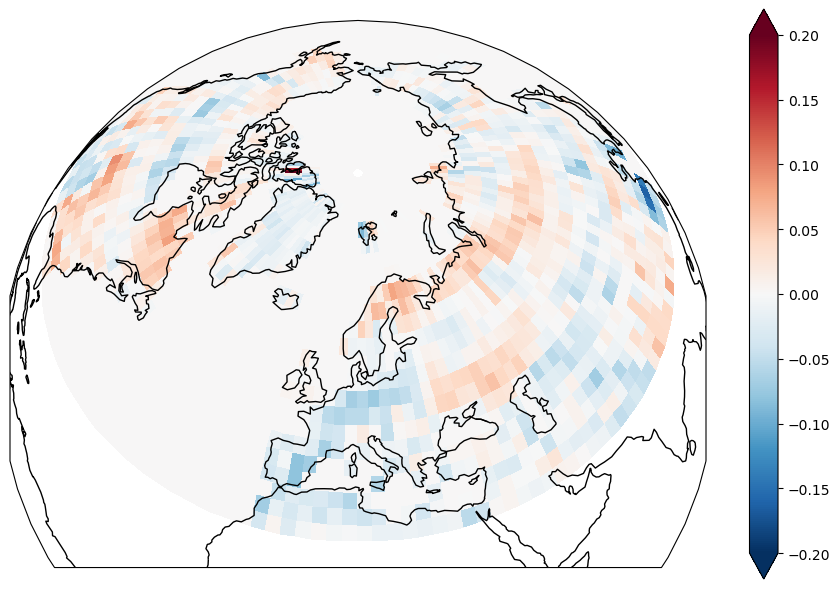

In [133]:

import cartopy.crs as ccrs
import general_purpose.cartopy_plots as cplt
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(9,6))
cplt.multiple_field_plot2(LON, LAT, fields['mrso'].var[3,0,:,:,np.newaxis],projections=[ccrs.Orthographic(10, 55)],
                        fig_num=8, put_colorbar=True, use_norm=True, levs=np.linspace(-.2,.2,32),
                        extents=[None, None, (-5, 10, 39, 60)],
                        mode='pcolormesh',draw_labels=False,draw_gridlines=False,
                        )

norm = <matplotlib.colors.TwoSlopeNorm object at 0x7fabb2fe1910>


<GeoAxesSubplot:>

<Figure size 900x600 with 0 Axes>

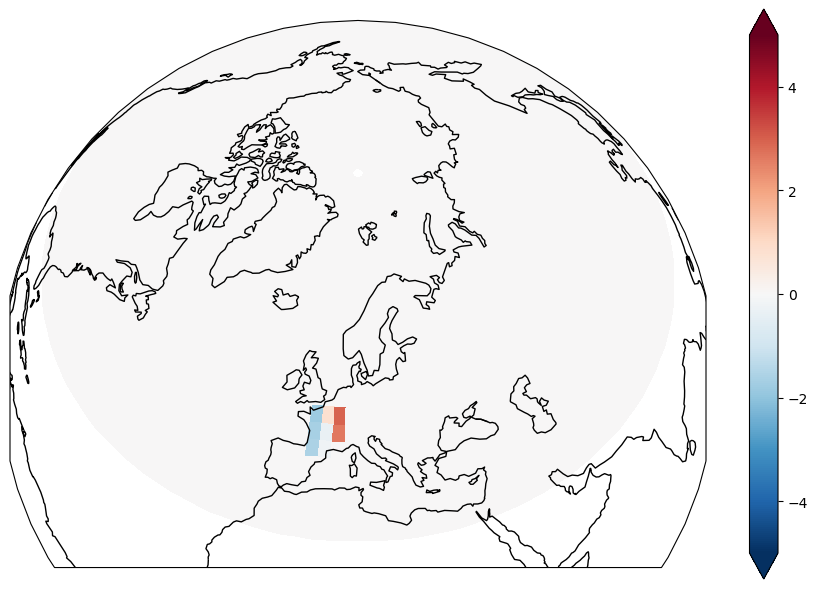

In [134]:

import cartopy.crs as ccrs
import general_purpose.cartopy_plots as cplt
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(9,6))
cplt.multiple_field_plot2(LON, LAT, fields['t2m'].var[3,0,:,:,np.newaxis],projections=[ccrs.Orthographic(10, 55)],
                        fig_num=8, put_colorbar=True, use_norm=True, levs=np.linspace(-5,5,32),
                        extents=[None, None, (-5, 10, 39, 60)],
                        mode='pcolormesh',draw_labels=False,draw_gridlines=False,
                        )

In [142]:
import itertools as its

Months1 = [0, 0, 0, 0, 0, 0, 31, 30, 31, 31, 30, 0, 0, 0] # Because of 3 day running mean we lose 2 days
Tot_Mon1 = list(its.accumulate(Months1))
X, Y, yp, lat, lon  = ln.prepare_data(**ut.set_values_recursive(ln.get_default_params(ln.prepare_data, recursive=True),
                                            {'fields': ['t2m','zg500','mrso_filtered'], 'year_list' : 'range(1950,2020)', 'mylocal' : '/net/nfs/ssd2/gmiloshe/Climate-Learning/ERA/', 
                                            'time_start' : Tot_Mon1[6], 'time_end' : Tot_Mon1[9], 'fillna' : 0, # Take into account number of days per month in CESM
                                            #'lon_start' : - 288//2, 'lon_end' : 288//2,
                                            #'lon_start' : -12, 'lon_end' : 36, 'nfolds' : 2, 'u' : 1,
                                            #'lat_end' : 192-40, 'lat_start' : 192-192*60//180, # latitudes start from 90 degrees North Pole
                                            'area': "Plasim_France", 'filter_area': "Plasim_France",
                                            'Model' : 'ERA5', 'datafolder' : 'Data_ERA5_regridded', 'dataset_years' : 1000, 'preprefix' : 'ANO_', 
                                            'lsmsource' : 'Data_ERA5_regridded/CONTROL_lsmask.nc', 'areasource' : 'Data_ERA5_regridded/CONTROL_gparea.nc'}))
LON, LAT = ln.np.meshgrid(lon, lat)

prepare_data:
  load_data:
    Opening field t2m
    The provided path strings are self.mylocal = '/net/nfs/ssd2/gmiloshe/Climate-Learning/ERA/', self.filename = 'Data_ERA5_regridded/ANO_t2m.nc'
    First valid path found in /net/nfs/ssd2/gmiloshe/Climate-Learning/ERA/Data_ERA5_regridded/ANO_t2m.nc
    monotonize_years:
    monotonize_years: completed in 0.0 s
    The loaded field has 70 years, not 1000 as provided. Setting self.years = 70
    First valid path found in /net/nfs/ssd2/gmiloshe/Climate-Learning/ERA/Data_ERA5_regridded/CONTROL_lsmask.nc
    First valid path found in /net/nfs/ssd2/gmiloshe/Climate-Learning/ERA/Data_ERA5_regridded/CONTROL_gparea.nc
    select_years:
    select_years: completed in 0.0 s
    sort_lat:
    sort_lat: completed in 0.0 s
    select_lonlat:
      Filling missing values with 0
    select_lonlat: completed in 0.3 s
    First valid path found in /net/nfs/ssd2/gmiloshe/Climate-Learning/ERA/Data_ERA5_regridded/CONTROL_lsmask.nc
    Failed to create mask

norm = <matplotlib.colors.TwoSlopeNorm object at 0x7fabb27521f0>


/tmp/ipykernel_2764276/3580664126.py:6: RuntimeWarning: invalid value encountered in true_divide
  cplt.multiple_field_plot2(LON, LAT, np.mean(X[Y==1,:,:,2:3],0)/ np.std(X[Y==1,:,:,2:3],0),projections=[ccrs.Orthographic(10, 55)],


<GeoAxesSubplot:>

<Figure size 900x600 with 0 Axes>

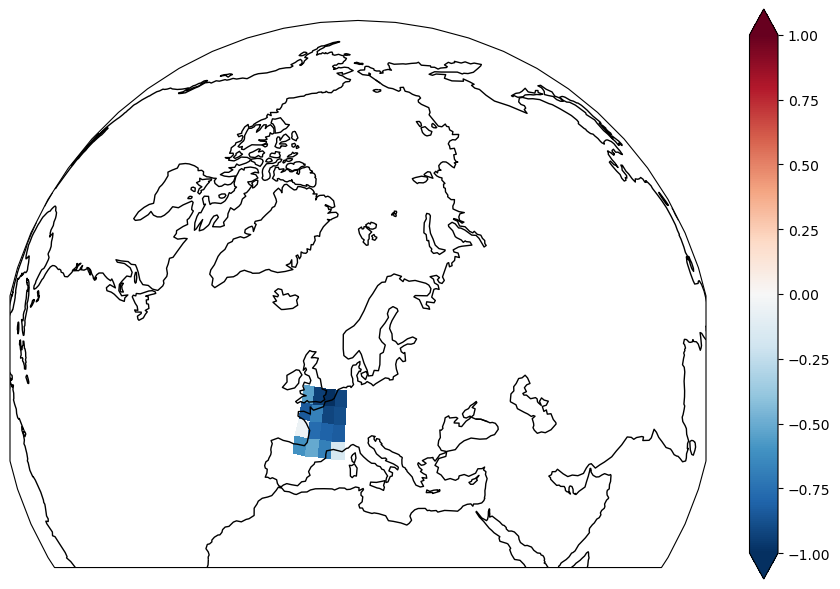

In [152]:

import cartopy.crs as ccrs
import general_purpose.cartopy_plots as cplt
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(9,6))
cplt.multiple_field_plot2(LON, LAT, np.mean(X[Y==1,:,:,2:3],0)/ np.std(X[Y==1,:,:,2:3],0),projections=[ccrs.Orthographic(10, 55)],
                        fig_num=8, put_colorbar=True, use_norm=True, levs=np.linspace(-1,1,32),
                        extents=[None, None, (-5, 10, 39, 60)],
                        mode='pcolormesh',draw_labels=False,draw_gridlines=False,
                        )

norm = <matplotlib.colors.TwoSlopeNorm object at 0x7fabb2474f70>


<GeoAxesSubplot:>

<Figure size 900x600 with 0 Axes>

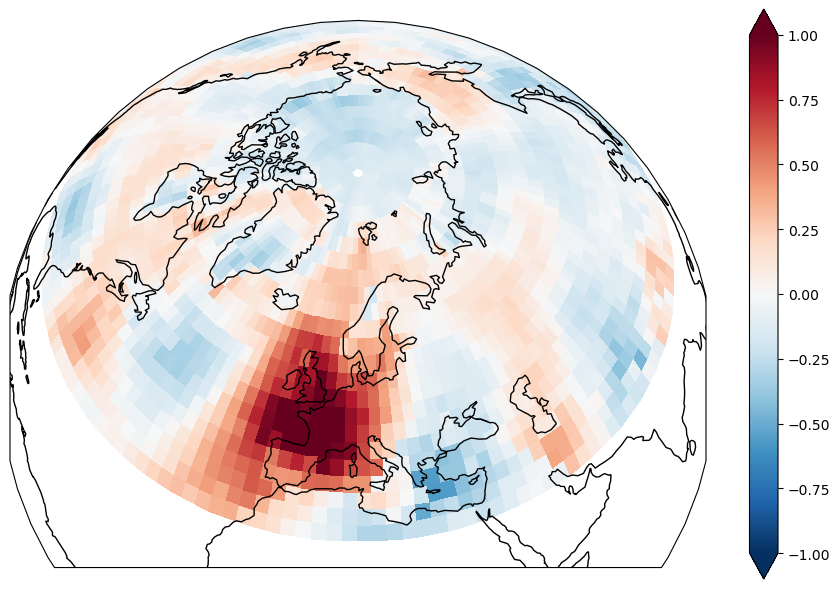

In [158]:

import cartopy.crs as ccrs
import general_purpose.cartopy_plots as cplt
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(9,6))
cplt.multiple_field_plot2(LON, LAT, np.mean(X[Y==1,:,:,:1],0)/np.std(X[Y==1,:,:,:1],0),projections=[ccrs.Orthographic(10, 55)],
                        fig_num=8, put_colorbar=True, use_norm=True, levs=np.linspace(-1,1,32),
                        extents=[None, None, (-5, 10, 39, 60)],
                        mode='pcolormesh',draw_labels=False,draw_gridlines=False,
                        )

norm = <matplotlib.colors.TwoSlopeNorm object at 0x7fabb21ded60>


<GeoAxesSubplot:>

<Figure size 900x600 with 0 Axes>

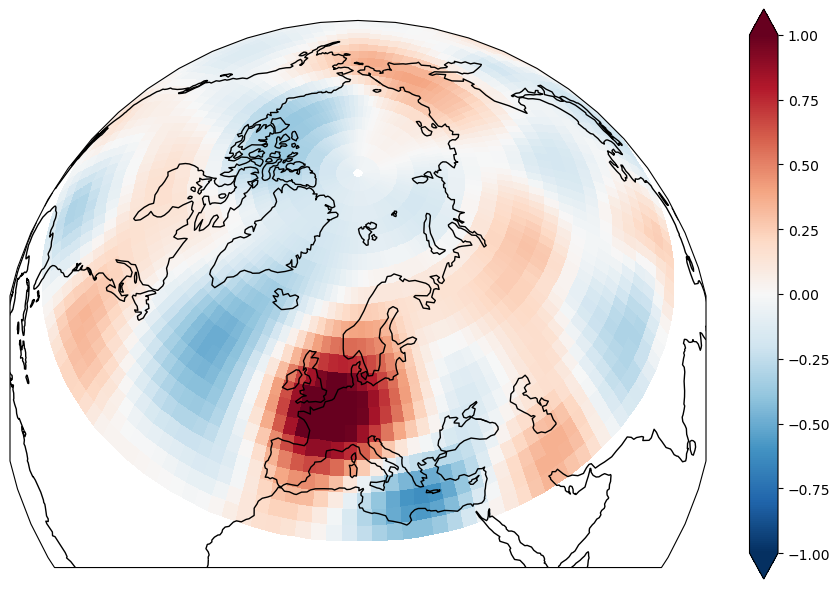

In [159]:

import cartopy.crs as ccrs
import general_purpose.cartopy_plots as cplt
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(9,6))
cplt.multiple_field_plot2(LON, LAT, np.mean(X[Y==1,:,:,1:2],0)/np.std(X[Y==1,:,:,1:2],0),projections=[ccrs.Orthographic(10, 55)],
                        fig_num=8, put_colorbar=True, use_norm=True, levs=np.linspace(-1,1,32),
                        extents=[None, None, (-5, 10, 39, 60)],
                        mode='pcolormesh',draw_labels=False,draw_gridlines=False,
                        )